# Datavisualisation

## Exploration du jeu de données

Importation des packages nécessaires

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV


Chargement des fichiers

In [12]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_m = pd.read_csv("merchants.csv")
df_new = pd.read_csv("new_merchant_transactions.csv")

#DataFrame réduit avec nrows
df_hist = pd.read_csv("historical_transactions.csv", nrows = 10000)

### Exploration du fichier new_merchant_transactions.csv

Variable numérique "purchase_amount"

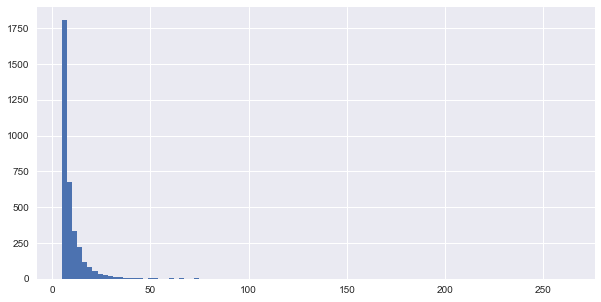

In [3]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_subplot(111)
#ax.hist(df_new["purchase_amount"], range = (5, 40), bins = 10);
ax.hist(df_new['purchase_amount'][df_new['purchase_amount']>5], bins=100);

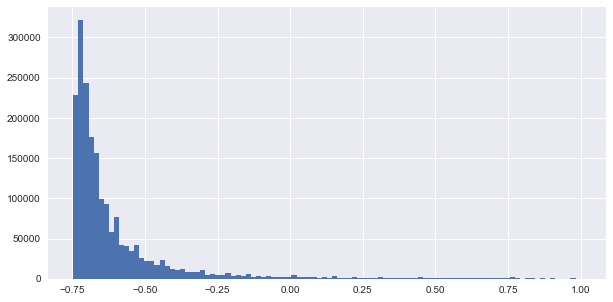

In [4]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_subplot(111)

ax.hist(df_new['purchase_amount'][df_new['purchase_amount']<1], bins=100);

On s'aperçoit que la quasi-totalité des valeurs est inférieure à -0.50.

Variable numérique "installments" (on exclut la valeur 0 () et la valeur 999 (deux occurences)

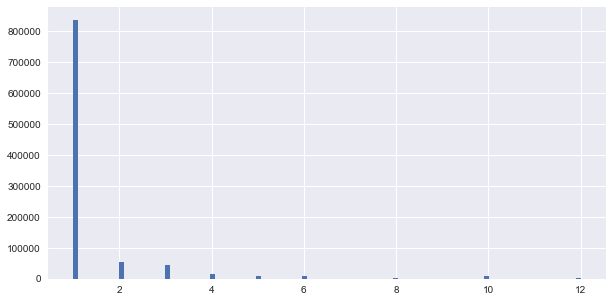

In [5]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_subplot(111)

ax.hist(df_new['installments'][(df_new['installments'] > 0) & (df_new["installments"] < 100)], bins=100);

In [6]:
df_new[(df_new['installments'] > 13)]["authorized_flag"].value_counts

<bound method IndexOpsMixin.value_counts of 231851    Y
631387    Y
Name: authorized_flag, dtype: object>

In [7]:
df_new[(df_new['installments'] > 13)]["authorized_flag"].value_counts()

Y    2
Name: authorized_flag, dtype: int64

In [8]:
df_train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

Tentative de régression sur le fichier train, pour voir -> ce n'est pas une bonne idée ! La relation n'est pas linéaire

In [15]:
target = df_train.target
data = df_train.drop(["first_active_month", "card_id", "target"], axis = 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 123)

In [76]:
df_train_test = df_train[(df_train.feature_1 == 3) & (df_train.feature_2 == 2) & (df_train.feature_3 == 1)]

In [77]:
df_train_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
6,2016-12,C_ID_7e63323c00,3,2,1,0.230129
7,2017-09,C_ID_dfa21fc124,3,2,1,2.135850
14,2017-08,C_ID_b6302b31c6,3,2,1,1.597750
42,2017-07,C_ID_994d1ce39d,3,2,1,-0.804864
46,2017-09,C_ID_f478df16fd,3,2,1,-1.029266


In [78]:
df_train_test.describe()

,feature_1,feature_2,feature_3,target
count,24417.0,24417.0,24417.0,24417.000000
mean,3.0,2.0,1.0,-0.296476
std,0.0,0.0,0.0,3.491006
min,3.0,2.0,1.0,-33.219281
25%,3.0,2.0,1.0,-0.992126
50%,3.0,2.0,1.0,-0.043991
75%,3.0,2.0,1.0,0.879699
max,3.0,2.0,1.0,15.606405


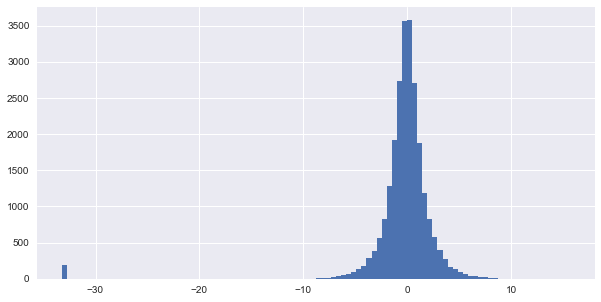

In [79]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_subplot(111)

ax.hist(df_train_test['target'], bins=100);

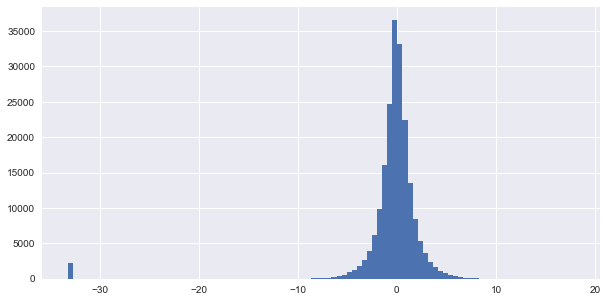

In [80]:
fig = plt.figure(figsize =(10, 5))
ax = fig.add_subplot(111)

ax.hist(df_train['target'], bins=100);

In [67]:
liste_cat1 = [1,2,3,4,5]
liste_cat2 = [1,2,3]
liste_cat3 = [0,1]
liste = []

for cat1 in liste_cat1:
    for cat2 in liste_cat2:
        for cat3 in liste_cat3:
            df_train_test = df_train[(df_train.feature_1 == cat1) & (df_train.feature_2 == cat2) & (df_train.feature_3 == cat3)]
            liste.append((str(cat1)+str(cat2)+str(cat3),df_train_test.shape[0]))
            
liste
    

[('110', 6508),
 ('111', 0),
 ('120', 2833),
 ('121', 0),
 ('130', 2696),
 ('131', 0),
 ('210', 24502),
 ('211', 0),
 ('220', 24469),
 ('221', 0),
 ('230', 6826),
 ('231', 0),
 ('310', 0),
 ('311', 24610),
 ('320', 0),
 ('321', 24417),
 ('330', 0),
 ('331', 24546),
 ('410', 9194),
 ('411', 0),
 ('420', 6923),
 ('421', 0),
 ('430', 3768),
 ('431', 0),
 ('510', 0),
 ('511', 24428),
 ('520', 0),
 ('521', 16197),
 ('530', 0),
 ('531', 0)]

In [71]:
df_train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [25]:
df_train_test = df_train[(df_train.feature_1 == 3) & (df_train.feature_2 == 2) & (df_train.feature_3 == 1)]
df_train_test = df_train_test[(df_train_test.first_active_month == "2017-09")]
df_train_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
7,2017-09,C_ID_dfa21fc124,3,2,1,2.135850
46,2017-09,C_ID_f478df16fd,3,2,1,-1.029266
119,2017-09,C_ID_ddce4462b9,3,2,1,1.404171
198,2017-09,C_ID_a0a63483bc,3,2,1,-1.794795
354,2017-09,C_ID_bdf8a74876,3,2,1,0.239629


Tests

In [14]:
test = df_test.set_index("card_id")
True in test.index.duplicated() #False : pas deux fois le même indice
test.head()

,first_active_month,feature_1,feature_2,feature_3
card_id,,,,
C_ID_0ab67a22ab,2017-04,3,3,1
C_ID_130fd0cbdd,2017-01,2,3,0
C_ID_b709037bc5,2017-08,5,1,1
C_ID_d27d835a9f,2017-12,2,1,0
C_ID_2b5e3df5c2,2015-12,5,1,1
